In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
!pip install gdown
import gdown
#this way, anyone can access the files without mounting google driving. Accessing the csv files:
csvFileID = '1f9F5zZLY1nawh3E1Ay8LPlhLcFgKuvDt'
url = f'https://drive.google.com/uc?id={csvFileID}'
csvOutputFile = 'mutli_classification_train.csv'
gdown.download(url, csvOutputFile, quiet=False)

#accessing the module files:
moduleFileID = '1GoMIkWx8lbzUdWbcY5utwC011Jr1A2qi'
url = f'https://drive.google.com/uc?id={moduleFileID}'
moduleOutputFile = 'KNN.py'
gdown.download(url, moduleOutputFile, quiet=False)
from KNN import KNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Downloading...
From: https://drive.google.com/uc?id=1f9F5zZLY1nawh3E1Ay8LPlhLcFgKuvDt
To: /content/mutli_classification_train.csv
100%|██████████| 18.4M/18.4M [00:00<00:00, 83.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1GoMIkWx8lbzUdWbcY5utwC011Jr1A2qi
From (redirected): https://drive.google.com/uc?id=1GoMIkWx8lbzUdWbcY5utwC011Jr1A2qi&confirm=t&uuid=9e9b83f2-ab00-46ac-b83c-aa96fc1a2042
To: /content/KNN.py
100%|██████████| 8.31k/8.31k [00:00<00:00, 13.4MB/s]


In [ ]:
data = pd.read_csv(csvOutputFile)
data.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Class
0,1,-90.532634,-66.953472,79.261856,-111.800554,126.403549,111.509348,207.728953,-26.600556,-106.229324,...,148.391734,77.835738,-10.728207,1.100625,1.035362,-87.010809,-16.242297,-32.074925,-17.666026,1
1,2,-103.156720,-16.070400,87.819228,12.614599,51.347780,67.483725,40.269172,51.442254,-151.486693,...,29.009475,3.995786,-10.861630,-142.605726,-25.924592,-86.755351,-36.479749,-130.246619,-44.143652,2
2,3,24.326153,-92.098078,82.238354,-56.795879,85.203996,127.916504,-90.080307,-128.124071,18.036020,...,111.810098,65.826018,-101.271203,-44.127749,-7.131464,-105.049759,-130.948256,-43.113523,-37.330448,4
3,4,-64.631737,-83.703583,84.135072,-5.516152,74.338494,112.630556,181.576798,-1.054023,60.469865,...,50.047108,100.439101,-117.842955,150.239788,-144.635542,-144.306209,-69.272905,-79.629675,-51.334456,2
4,5,-55.473830,-78.853237,88.129107,75.200543,76.991520,60.224711,-13.106559,-146.773016,-33.490566,...,85.988282,23.381960,11.876102,-188.296503,-80.323929,-56.757987,-20.314172,-42.625170,-24.102753,2


In [ ]:
feature_col = [f"Feature_{i}" for i in range(1,21)]
X = data[feature_col].to_numpy()
Y = data['Class'].to_numpy()
IDs = data['ID'].to_numpy()

In [ ]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

In [ ]:
print(X.shape)
print(Y.shape)

(48000, 20)
(48000,)


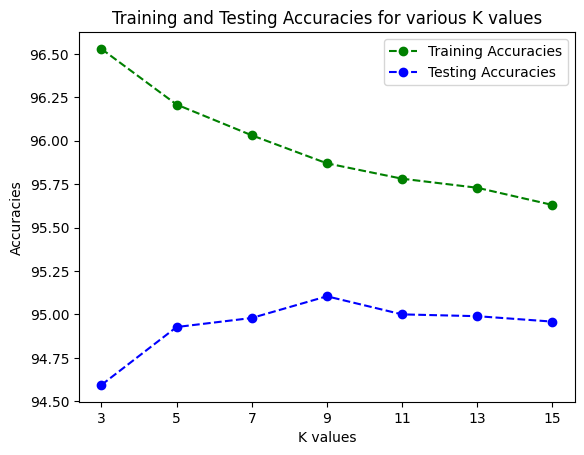

In [ ]:
model = KNN(distance_metric='euclidean')
k_vals = [3,5,7,9,11,13,15]
model.get_elbow(X, Y, k_vals)
# y_preds = model.predict(X, Y, X, knn_k=3)
print("this")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class KNN:
    def __init__(self,distance_metric='euc'):
        if 'euc' in distance_metric or 'l2' in distance_metric:
            self.dist_func = self.euc_dist
        elif 'man' in distance_metric or 'l1' in distance_metric:
            self.dist_func = self.manh_dist
        else:
            raise Exception("Unsupported distance function")
    def euc_dist(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2, axis=1))

    def manh_dist(self, x1,x2):
        return np.sum(np.absolute(x1-x2))

    def majority_vote(self,neighbrs):
        uniq_labels, cnts = np.unique(neighbrs,return_counts=True)
        majority_label = uniq_labels[np.argmax(cnts)]
        return majority_label
    def predict(self, x_train, y_train,x_test,knn_k=3):
        """
        args:
        X_train --> a 2d array of shape (m,n) where m is no of eg. and n is no of features
        Y_train --> a 1d array of shape (m,)
        X_test --> a 2d array, of shape (m_test,n) where m_test is no of eg in testing
        knn_k --> value of k of KNN
        returns:
        Y_pred --> a 1d array of shape (m_test,)
        """
        Y_pred = []
        for test_pt in x_test:
            distances = self.dist_func(test_pt, x_train)
            sorted_indices = np.argsort(distances)
            k_nearest_negih = y_train[sorted_indices[:knn_k]]
            prediction = self.majority_vote(k_nearest_negih)
            Y_pred.append(prediction)
        Y_pred = np.array(Y_pred)
        return Y_pred
    def k_fold_cv(self, X, Y, k_folds=5, knn_k = 3, details=True,plt_acc=True,print_conf_matrix=True,print_report=True):
        m = Y.shape[0]
        indxs = np.random.permutation(m)
        X_shuffled = X[indxs,:]
        Y_shuffled = Y[indxs]
        fold_size = m // k_folds
        testing_accuracies = []
        training_accuracies = []
        for fold in range(k_folds):
            test_start = fold*fold_size
            test_end = (fold+1)*fold_size if fold < k_folds - 1 else m
            X_train = np.concatenate((X_shuffled[:test_start,:], X_shuffled[test_end:,:]), axis=0)
            Y_train = np.concatenate((Y_shuffled[:test_start], Y_shuffled[test_end:]))
            X_test = X_shuffled[test_start:test_end,:]
            Y_test = Y_shuffled[test_start:test_end]
            training_preds = self.predict(X_train, Y_train, X_train, knn_k)
            testing_preds = self.predict(X_train, Y_train, X_test, knn_k)
            training_acc = self.get_accuracy(Y_train, training_preds)
            training_accuracies.append(training_acc)
            testing_acc = self.get_accuracy(Y_test, testing_preds)
            testing_accuracies.append(testing_acc)
            print(f"Training Accuracy for fold: {fold+1} is {training_acc}") if details else None
            print(f"Testing Accuracy for fold: {fold+1} is {testing_acc}") if details else None
            if print_conf_matrix:
                print(f"Training Confusion Matrix for fold {fold+1}:")
                conf_matx_tr = self.get_conf_mat(Y_train, training_preds)
                self.print_con_mat(conf_matx_tr)
                print(f"Testing Confusion Matrix for fold {fold+1}: ")
                conf_matx_te = self.get_conf_mat(Y_test, testing_preds)
                self.print_con_mat(conf_matx_te)
            if print_report:
                print(f"Training Classification Report for fold {fold+1}:")
                self.classification_report(Y_train, training_preds)
                print(f"Testing Classification Report for fold {fold+1}:")
                self.classification_report(Y_test, testing_preds)
        self._plotter_for_CV(training_accuracies, testing_accuracies) if plt_acc else None
        mean_of_training_accuracies = np.mean(training_accuracies)
        mean_of_testing_accuracies = np.mean(testing_accuracies)
        return training_accuracies, testing_accuracies, mean_of_training_accuracies, mean_of_testing_accuracies
    def _plotter_for_CV(self, training_accuracies, testing_accuracies):
        k_folds = len(training_accuracies)
        plt.plot(np.arange(1,k_folds+1), training_accuracies, c='green',label='Training Accuracy')
        plt.plot(np.arange(1,k_folds+1), testing_accuracies, c='blue',label='Testing Accuracy')
        plt.xlabel("Folds")
        plt.ylabel("Accuracies")
        plt.title("Folds vs Accuracies")
        plt.legend()
        plt.show()
    def get_conf_mat(self, Y_act, Y_pred):
        n_cls = len(np.unique(Y_act))
        con_mat = np.zeros((n_cls, n_cls))
        for indx, label in enumerate(Y_act):
            con_mat[label, Y_pred[indx]] += 1

        return con_mat

    def get_accuracy(self, Y_act, Y_pred):
        return 100*np.mean(Y_act == Y_pred)
    def print_con_mat(self, con_mat):
        print("Confusion matrix with predictions on X axis and actual values on Y")
        classes= np.arange(con_mat.shape[0])
        table = pd.DataFrame(con_mat, index=classes, columns=classes)
        print(table)

    def get_precision(self,con_mat):
        precs = np.zeros((con_mat.shape[0],))
        for i in range(con_mat.shape[0]):
            precs[i] = con_mat[i,i]/np.sum(con_mat[:,i])

        return precs

    def get_recall(self, con_mat):
        recs = np.zeros((con_mat.shape[0],))
        for i in range(con_mat.shape[0]):
            recs[i] = con_mat[i,i]/np.sum(con_mat[i,:])

        return recs

    def get_f1s(self, con_mat):
        precs = self.get_precision(con_mat)
        recs = self.get_recall(con_mat)
        f1s = 2*recs*precs/(recs + precs)
        return f1s

    def classification_report(self, Y_act, Y_pred):
        con_mat = self.get_conf_mat(Y_act, Y_pred)
        precs = self.get_precision(con_mat)
        recs = self.get_recall(con_mat)
        f1s = self.get_f1s(con_mat)
        supports = con_mat.sum(axis=1)
        classes= np.arange(con_mat.shape[0])
        reports = []
        for i in range(con_mat.shape[0]):
            reports.append([precs[i], recs[i], f1s[i], supports[i]])
        table1 = pd.DataFrame(reports,index=classes, columns=['precision','recall','f1-score','support'])
    # print(table1)
        wted_prec = np.average(precs, weights=supports)
        wted_rec = np.average(recs, weights=supports)
        wted_f1 = np.average(f1s, weights=supports)
        tot_support = np.sum(supports)
        wted_data = [[wted_prec,wted_rec,wted_f1,tot_support]]
        table2 = pd.DataFrame(wted_data,index=['Average (weighted)'],columns=['precision', 'recall', 'f1-score', 'support'])
        # print('\n\n', table2)
        table = pd.concat([table1, table2])
        print(table)
        print(f"Accuracy: {self.get_accuracy(Y_pred, Y_act)}%")


    def get_elbow(self, X, Y,list_of_ks, split_fraction=0.8):
        indxs = np.random.permutation(Y.shape[0])
        X_shuffled = X[indxs]
        Y_shuffled = Y[indxs]
        split_index = int(split_fraction* Y.shape[0])
        # print("split_indx is", split_index)
        X_train, X_test = X_shuffled[:split_index,:], X_shuffled[split_index:,:]
        Y_train, Y_test = Y_shuffled[:split_index], Y_shuffled[split_index:]
        training_accs = []
        testing_accs = []
        for k in list_of_ks:
            Y_pred_train = self.predict(X_train, Y_train, X_train,knn_k=k)
            training_acc = self.get_accuracy(Y_train, Y_pred_train)
            Y_pred_test = self.predict(X_train, Y_train, X_test, knn_k=k)
            testing_acc = self.get_accuracy(Y_test, Y_pred_test)
            training_accs.append(training_acc)
            testing_accs.append(testing_acc)
        plt.plot(list_of_ks, training_accs, linestyle='--',color='green', marker='o',label='Training Accuracies')
        plt.plot(list_of_ks, testing_accs, linestyle='--', color='blue', marker='o', label = 'Testing Accuracies')
        plt.xticks(list_of_ks)
        plt.xlabel('K values')
        plt.ylabel('Accuracies')
        plt.title('Training and Testing Accuracies for various K values')
        plt.legend()
        plt.show()

From the elbow curve, K = 9 is the best K value. Now training the model on this value:

In [ ]:
model2 = KNN()
y_preds = model2.predict(X, Y, X, knn_k=9)
print(np.mean(y_preds == Y))

0.96
